<a href="https://colab.research.google.com/github/Nardos-Amakele/Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Report on K-Means Clustering Analysis of the Iris Dataset
**bold text**
In this experiment the iris dataset was used. The datset is already found in "sklearn.datasets." The dataset(consisting 150 samples) was imported in the first cell and its keywords and description were printed to read and be familiarized in the dataset. Then, the dataset was coneverted into a pandas DataFrame and the target label was added where the head is displayed to view the features(4) and the target(species).

**Preprocessing the data:** The presence of missing values is checked where I confirmed there were no missing values. Then duplicates were removed and 1 was found.The feature and target were split for model training. To ensures that all features contribute equally to the model the features were standardized(scaled) using StandardScaler and then the head was printed to visulaize the change. Then, outlier removal was used as a preprocessing step.

After this, K-means clustering was conducted for a range of k values, from 3 to 15, and the Silhouette Score for each value of k was calculated.As the value of k increases, the score decreases. This showed the addition of more clusters decreases the quality of the clustering.The clustering result shows a picture from cell 7 that visualizes how the clusters get developed by changing k that helped visualize the pattern of clustering. After this the code took the better value of k based on the result of the metrics, which in our case was 3.

Finally, The confusion matrix was calculated which showed poor clustering performance by the k-means model, which had misclassification across all classes. Setosa was mainly assigned to Cluster 1 (15 samples) and Cluster 2 (31 samples), with none in Cluster 0. Versicolor was largely misclassified into Cluster 0 (46 samples), while Virginica was entirely placed in Cluster 0 (45 samples).

*NB: Although the data was preprocessed(duplicates removed, scaled and outliners removed), the result was poor which I belive was caused by the model used in this experiment.Hence, I beleive a model change might make the prediction better.*
*italicized text*

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.keys())
print(iris['DESCR'])


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [ ]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
df = df.drop_duplicates()

print(f"Shape of dataset after removing duplicates: {df.shape}")


Shape of dataset after removing duplicates: (149, 5)


In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(random_state=42, contamination=0.05)
outliers = iso_forest.fit_predict(df.iloc[:, :-1])

df = df[outliers == 1]

print(f"Shape of dataset after removing outliers: {df.shape}")


Shape of dataset after removing outliers: (141, 5)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (141, 4)
Target shape: (141,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled features:")
print(X_scaled[:5])


First 5 rows of scaled features:
[[-0.9214071   1.13692063 -1.37799033 -1.33417599]
 [-1.17918171 -0.09430678 -1.37799033 -1.33417599]
 [-1.43695632  0.39818418 -1.43686809 -1.33417599]
 [-1.56584362  0.1519387  -1.31911256 -1.33417599]
 [-1.05029441  1.38316612 -1.37799033 -1.33417599]]


Silhouette Score for k=3: 0.49


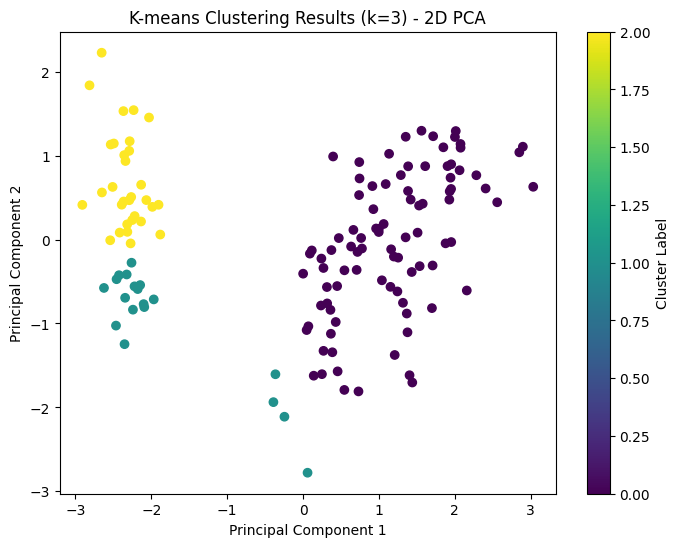

Silhouette Score for k=4: 0.39


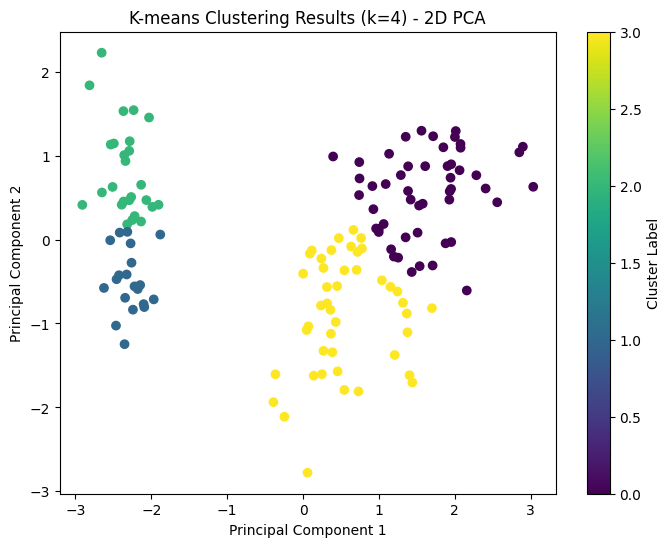

Silhouette Score for k=5: 0.35


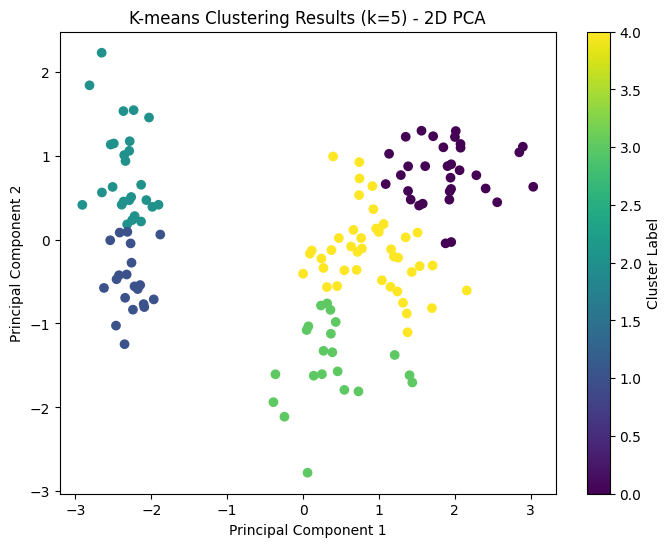

Silhouette Score for k=6: 0.31


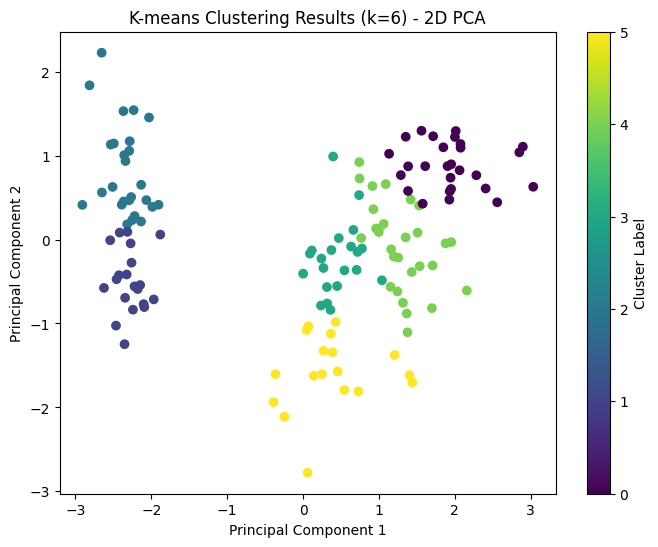

Silhouette Score for k=7: 0.32


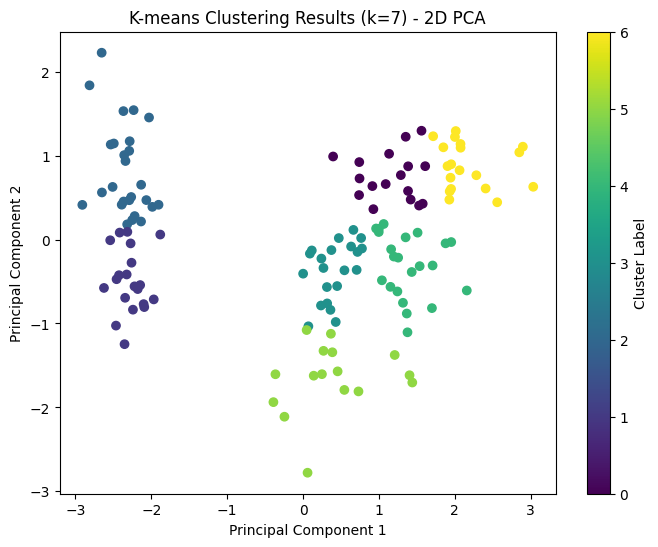

Silhouette Score for k=8: 0.35


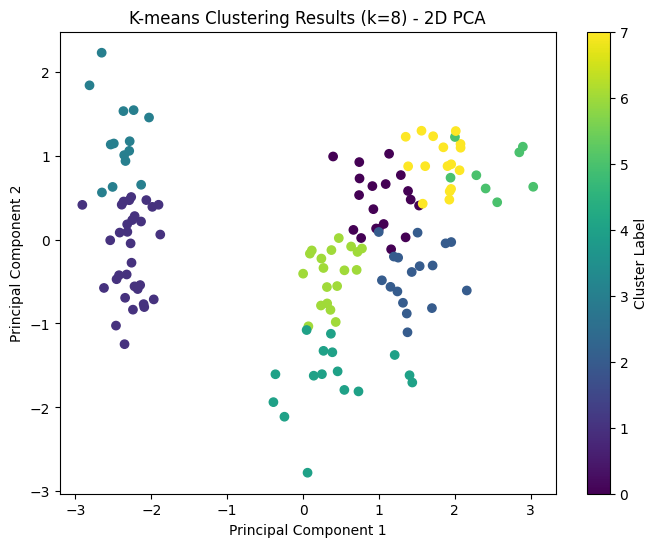

Silhouette Score for k=9: 0.35


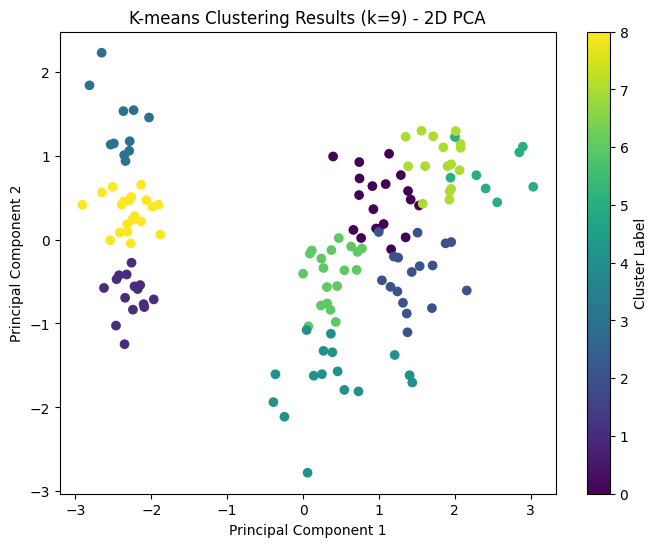

Silhouette Score for k=10: 0.33


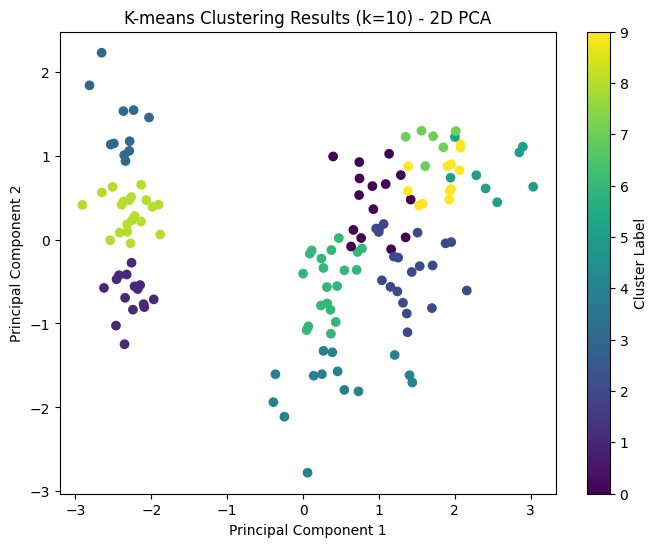

Silhouette Score for k=11: 0.32


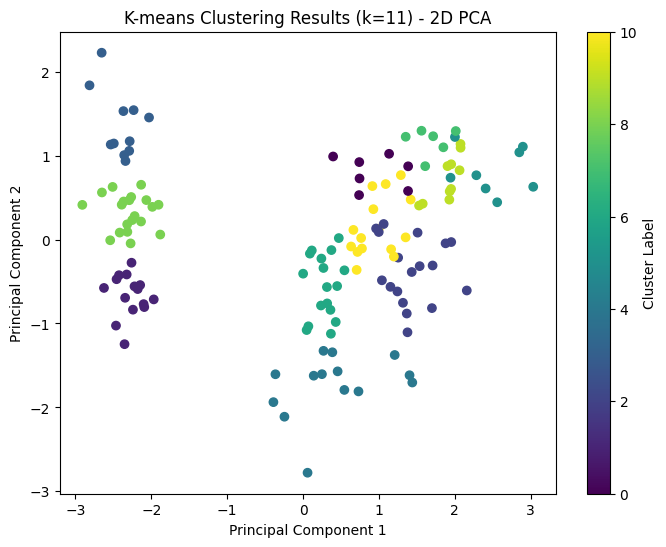

Silhouette Score for k=12: 0.32


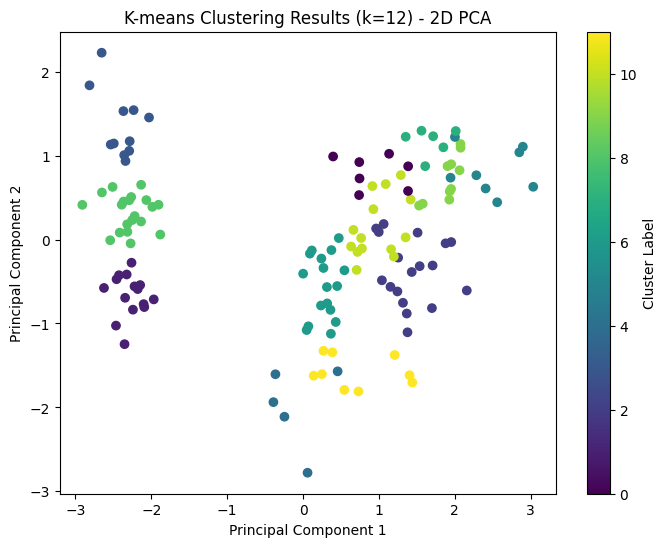

Silhouette Score for k=13: 0.34


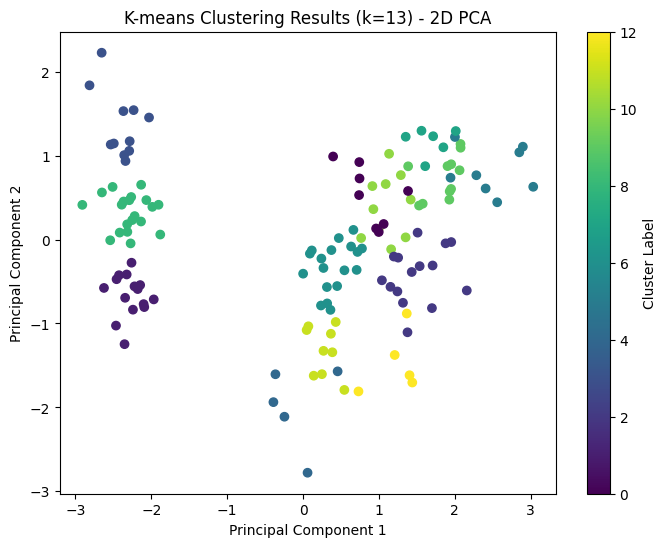

Silhouette Score for k=14: 0.32


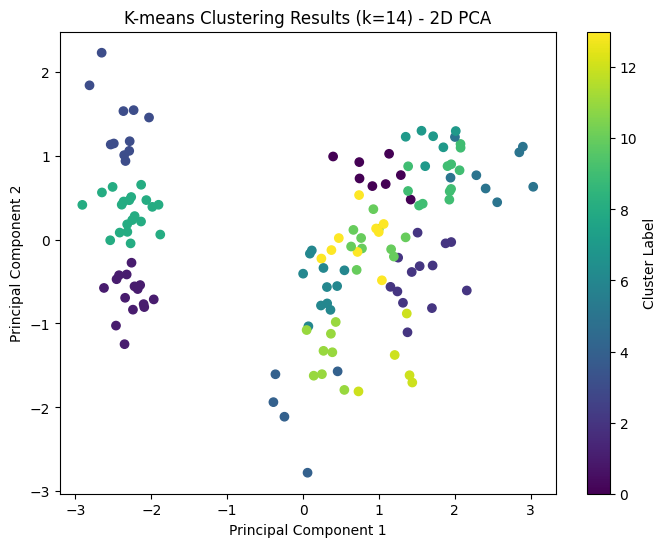

Best k based on silhouette score: 3


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

best_k = None
best_score = -1
best_cluster_labels = None

k_range = range(3, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.2f}")

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k
        best_cluster_labels = cluster_labels

    plt.figure(figsize=(8, 6))
    X_pca = PCA(n_components=2).fit_transform(X_scaled)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'K-means Clustering Results (k={k}) - 2D PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

print(f"Best k based on silhouette score: {best_k}")

In [ ]:
print(df.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

actual_labels = df['target'].values

conf_matrix = confusion_matrix(actual_labels, best_cluster_labels)

conf_matrix_df = pd.DataFrame(conf_matrix, columns=[f'Cluster {i}' for i in range(best_k)],
                               index=['Setosa', 'Versicolor', 'Virginica'])

print("Confusion Matrix between true labels and predicted clusters:")
print(conf_matrix_df)

Confusion Matrix between true labels and predicted clusters:
            Cluster 0  Cluster 1  Cluster 2
Setosa              0         15         31
Versicolor         46          4          0
Virginica          45          0          0
